In [52]:
#k最近傍法（2018年12月〜2019年6月中旬までの糖度を予測）

In [2]:
%matplotlib inline
import sys
sys.path.append('/home/yoshida/.pyenv/versions/3.6.6/lib/python3.6/site-packages')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA 

In [3]:
# データの読み込み
data = pd.read_csv("../src/Aiko_normalization_ver3_aaa.csv")
df = pd.DataFrame(data)

In [4]:
# データの読み込み
#data = pd.read_csv("../src/Aiko_normalization_ver3.1_after_normalize.csv")
#df = pd.DataFrame(data)

In [5]:
df.shape

(2176, 21)

In [6]:
df.drop(['No','width','height','seed_date','house','url', 'COL_21'], axis=1, inplace=True) #対象の列を削除

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2176 entries, 0 to 2175
Data columns (total 14 columns):
current_date      2176 non-null object
sweet             2176 non-null float64
sweet_category    2176 non-null int64
size              2176 non-null float64
AveCO2_7          2176 non-null float64
AveSatu_7         2176 non-null float64
AveHum_7          2176 non-null float64
AveTemp_7         2176 non-null float64
AveMaxTemp_7      2176 non-null float64
AveMinTemp_7      2176 non-null float64
AveDiffTemp_7     2176 non-null float64
SumMaxTemp_7      2176 non-null float64
SumMinTemp_7      2176 non-null float64
SumDiffTemp_7     2176 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 238.1+ KB


In [8]:
df.head()

,current_date,sweet,sweet_category,size,AveCO2_7,AveSatu_7,AveHum_7,AveTemp_7,AveMaxTemp_7,AveMinTemp_7,AveDiffTemp_7,SumMaxTemp_7,SumMinTemp_7,SumDiffTemp_7
0,11月28日,4.3,2,7.54,614.28,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9
1,11月28日,4.5,2,6.48,614.28,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9
2,11月28日,4.0,1,8.68,614.28,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9
3,11月28日,3.5,1,10.50,614.28,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9
4,11月28日,4.3,2,7.00,614.28,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9


In [9]:
df['month'] = df['current_date'].str[:2] # "11月28日"とか"4月3日"の月日の先頭2文字だけ抽出
df['month'] = df['month'].str.strip('月') # このままだと"4月"のように"月"が入っているので、"月"を削除する
# 参考：https://deepage.net/features/pandas-str-extract.html
# 参考：https://deepage.net/features/pandas-str-replace.html
df['month'].isnull().sum() # 欠損値がないかを確認

df.drop(['current_date'], axis=1, inplace=True) # current_dateはもう使わない
print(df.shape)

(2176, 14)


In [10]:
# 四半期を求める(4~6月:1st、7~9月:2nd、10~12月:3rd、1~3月:4th)(＊＊＊＊使うか使わないか＊＊＊＊)
df['quarter'] = df['month'].replace({'4': '1st', '5': '1st', '6': '1st', 
                                     '7': '2nd', '8': '2nd', '9': '2nd', 
                                     '10': '3rd', '11': '3rd', '12': '3rd', 
                                     '1': '4th', '2': '4th', '3': '4th'
                                    })

In [11]:
# ダミー変数の作成
df = pd.get_dummies(df, columns=['quarter'], drop_first=True)

In [12]:
df.drop(['month'], axis=1, inplace=True)

In [13]:
y = df["sweet_category"] #目的変数
df.drop(['sweet','sweet_category'], axis=1, inplace=True) #目的変数の列を削除
print(df.shape)

(2176, 13)


In [14]:
df.head(3)

,size,AveCO2_7,AveSatu_7,AveHum_7,AveTemp_7,AveMaxTemp_7,AveMinTemp_7,AveDiffTemp_7,SumMaxTemp_7,SumMinTemp_7,SumDiffTemp_7,quarter_3rd,quarter_4th
0,7.54,614.28,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9,1,0
1,6.48,614.28,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9,1,0
2,8.68,614.28,6.17,66.84,21.14,26.24,18.83,7.41,183.7,131.8,51.9,1,0


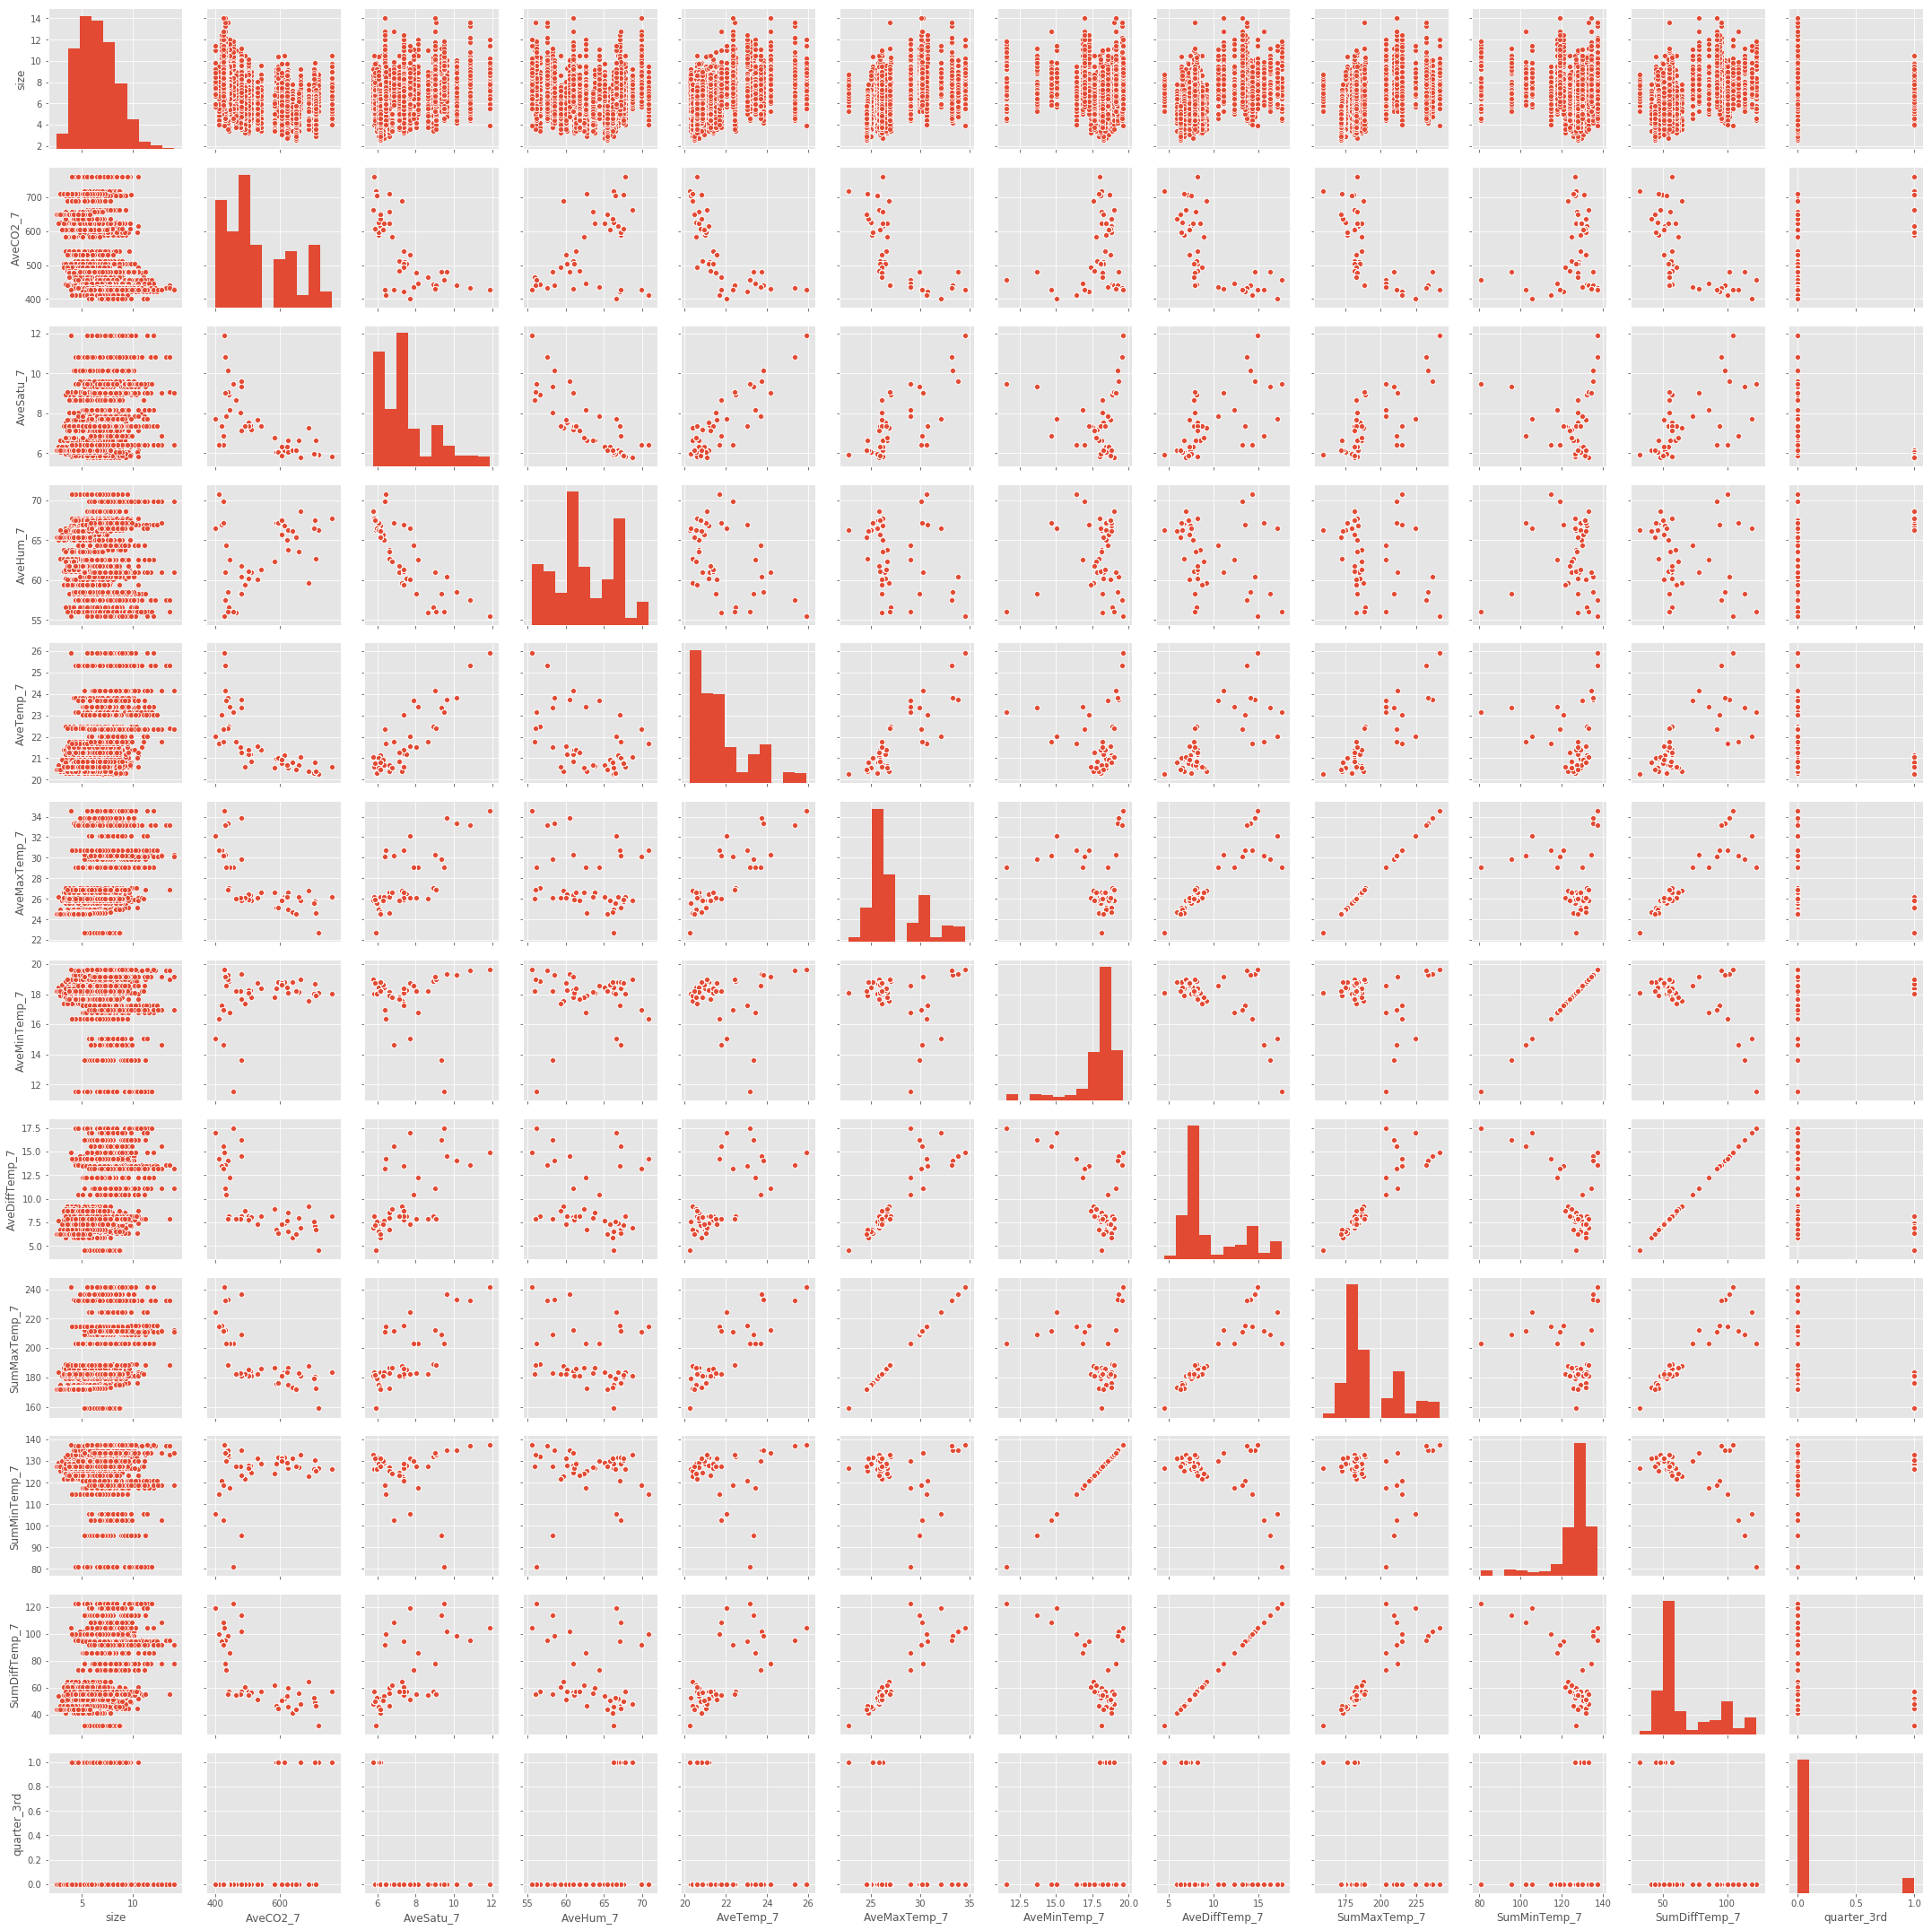

In [15]:
sns.pairplot(df.iloc[:,:-1])

In [17]:
pca = PCA(n_components=3)                     # 3次元に圧縮するPCAインスタンスを作成
X = pca.fit_transform(df.iloc[:,:-1].values)  # wineデータをPCAで次元圧縮
embed3 = pd.DataFrame(X)                      # 可視化のためにデータフレームに変換
#embed3["label"] = df["label"]                 
embed3.head()                                 # データフレームの先頭を表示

,0,1,2
0,81.770975,-2.594564,-5.412488
1,81.777197,-2.619617,-5.408846
2,81.764284,-2.567620,-5.416404
3,81.753601,-2.524604,-5.422657
4,81.774145,-2.607327,-5.410632


In [21]:
box = PCA(n_components=2).fit_transform(df.iloc[:,:-1].values)

In [28]:
box[:, 0]

array([  81.77097542,   81.77719718,   81.76428409, ..., -143.47589742,
       -143.48153222, -143.49333008])

In [29]:
len(box[:, 0])

2176

In [100]:
# AveDiffTemp_7、AveSatu_7、monthを対象としたい時
df.drop(['AveCO2_7', 'AveSatu_7', 'AveTemp_7', 'AveHum_7', 'AveMinTemp_7', 'AveDiffTemp_7', 'SumMaxTemp_7','SumMinTemp_7','SumDiffTemp_7'], axis=1, inplace=True)
#df.drop(['AveCO2_7', 'AveHum_7', 'AveTemp_7', 'AveMaxTemp_7', 'AveMinTemp_7','SumMaxTemp_7','SumMinTemp_7','SumDiffTemp_7'], axis=1, inplace=True)

In [101]:
df.head()

,current_date,sweet,sweet_category,size,AveMaxTemp_7
0,11月28日,4.3,2,7.54,26.24
1,11月28日,4.5,2,6.48,26.24
2,11月28日,4.0,1,8.68,26.24
3,11月28日,3.5,1,10.50,26.24
4,11月28日,4.3,2,7.00,26.24


In [102]:
# 'AveCO2_7', 'AveSatu_7', 'AveHum_7', 'AveTemp_7', 'AveMaxTemp_7', 'AveMinTemp_7','AveDiffTemp_7','SumMaxTemp_7','SumMinTemp_7','SumDiffTemp_7'

In [103]:
df['month'] = df['current_date'].str[:2] # "11月28日"とか"4月3日"の月日の先頭2文字だけ抽出
df['month'] = df['month'].str.strip('月') # このままだと"4月"のように"月"が入っているので、"月"を削除する
# 参考：https://deepage.net/features/pandas-str-extract.html
# 参考：https://deepage.net/features/pandas-str-replace.html
df['month'].isnull().sum() # 欠損値がないかを確認

df.drop(['current_date'], axis=1, inplace=True) # current_dateはもう使わない
print(df.shape)

(2176, 5)


In [104]:
# 四半期を求める(4~6月:1st、7~9月:2nd、10~12月:3rd、1~3月:4th)(＊＊＊＊使うか使わないか＊＊＊＊)
df['quarter'] = df['month'].replace({'4': '1st', '5': '1st', '6': '1st', 
                                     '7': '2nd', '8': '2nd', '9': '2nd', 
                                     '10': '3rd', '11': '3rd', '12': '3rd', 
                                     '1': '4th', '2': '4th', '3': '4th'
                                    })

In [105]:
df.head(5)

,sweet,sweet_category,size,AveMaxTemp_7,month,quarter
0,4.3,2,7.54,26.24,11,3rd
1,4.5,2,6.48,26.24,11,3rd
2,4.0,1,8.68,26.24,11,3rd
3,3.5,1,10.50,26.24,11,3rd
4,4.3,2,7.00,26.24,11,3rd


In [106]:
# ダミー変数の作成
df = pd.get_dummies(df, columns=['quarter'], drop_first=True)

In [107]:
df.head()

,sweet,sweet_category,size,AveMaxTemp_7,month,quarter_3rd,quarter_4th
0,4.3,2,7.54,26.24,11,1,0
1,4.5,2,6.48,26.24,11,1,0
2,4.0,1,8.68,26.24,11,1,0
3,3.5,1,10.50,26.24,11,1,0
4,4.3,2,7.00,26.24,11,1,0


In [108]:
df.drop(['month'], axis=1, inplace=True)

In [109]:
y = df["sweet_category"] #目的変数
df.drop(['sweet','sweet_category'], axis=1, inplace=True) #目的変数の列を削除
print(df.shape)

(2176, 4)


In [110]:
df.head()

,size,AveMaxTemp_7,quarter_3rd,quarter_4th
0,7.54,26.24,1,0
1,6.48,26.24,1,0
2,8.68,26.24,1,0
3,10.50,26.24,1,0
4,7.00,26.24,1,0


In [111]:
# 標準化
from sklearn import preprocessing
df = preprocessing.scale(df)

/home/yoshida/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until


In [112]:
# 訓練セットとテストセットに分割
#X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, stratify=y, random_state=0)
#stratify は母集団のカテゴリの割合を保って分割するもので、目的変数を指定するのが一般的
from sklearn.model_selection import train_test_split
X_trainval, X_test, y_trainval, y_test = train_test_split(df, y, test_size=0.3, random_state=0, stratify=y)

In [113]:
# ハイパーパラメータを辞書型
params_grid = {'weights': ['uniform', 'distance'], 'n_neighbors':[3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21]}

In [114]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [115]:
grid_search = GridSearchCV(KNeighborsClassifier(), params_grid, scoring="accuracy",cv=10, n_jobs=-1)# 上記で用意したパラメーターごとに交差検証を実施

In [116]:
grid_search.fit(X_trainval, y_trainval ) # 学習

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'weights': ['uniform', 'distance'], 'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [117]:
# グリッドサーチの結果
print('Best cross-validation: {}'.format(round(grid_search.best_score_, 3)))
print('Best parameters : {}'.format(grid_search.best_params_))

Best cross-validation: 0.734
Best parameters : {'n_neighbors': 20, 'weights': 'distance'}


In [118]:
print('Test set score : {}'.format(round(grid_search.score(X_test, y_test), 3)))

Test set score : 0.74


In [119]:
# https://docs.google.com/document/d/1Ke9i88Wi6zBMIs36xYilp6JHD68RX8EZsNMD03imQno/edit
# 一番よかったのは、[aveTemp,aveCO2], [aveMaxTemp, aveHum]の2つで、訓練：テストでそれぞれ[74.4, 76.7], [75.0, 76.7]

In [120]:
#多クラスの混合行列を作成

In [121]:
from sklearn.metrics import confusion_matrix

In [122]:
clf = grid_search.best_estimator_

In [123]:
pred = clf.predict(X_test)

In [124]:
print(confusion_matrix(y_test, pred))

[[ 51  25   1   0]
 [ 18 119  33   0]
 [  2  30 171  25]
 [  1   0  35 142]]
